# Nhập môn khoa học dữ liệu đồ án cuối kỳ _ Nhóm 12

Thông tin nhóm:
- 22120367 - Lê Hồng Tiến
- 22120380 - Hồ Nhất Trí
- 22120382 - Nguyễn Anh Trí
- 22120395 - Nguyễn Sinh Trực
- 22120399 - Nguyễn Lê Anh Tú


## Thu thập dữ liệu

## Khai báo các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Tiền xử lý dữ liệu
### Đọc dữ liệu từ file vào dataframe.

In [2]:
file_name = 'arxiv_cs_papers_all.csv'
raw_df = pd.read_csv(file_name)
raw_df.head()

,paper_id,authors,updated,published,title,abstract,categories,comment
0,http://arxiv.org/abs/2412.10373v1,"Sicheng Zuo,Wenzhao Zheng,Yuanhui Huang,Jie Zh...",2024-12-13 18:59:54,2024-12-13 18:59:54,GaussianWorld: Gaussian World Model for Stream...,3D occupancy prediction is important for aut...,"cs.CV,cs.AI,cs.LG",Code is available at: https://github.com/zuosc...
1,http://arxiv.org/abs/2412.10371v1,"Wenzhao Zheng,Junjie Wu,Yao Zheng,Sicheng Zuo,...",2024-12-13 18:59:30,2024-12-13 18:59:30,GaussianAD: Gaussian-Centric End-to-End Autono...,Vision-based autonomous driving shows great ...,"cs.CV,cs.AI,cs.LG,cs.RO",Code is available at: https://github.com/wzzhe...
2,http://arxiv.org/abs/2402.01886v2,"Mark Beliaev,Ramtin Pedarsani",2024-12-13 18:59:14,2024-02-02 20:21:09,Inverse Reinforcement Learning by Estimating E...,"In Imitation Learning (IL), utilizing subopt...","cs.LG,cs.AI","11 pages, 4 figures, extended version of AAAI ..."
3,http://arxiv.org/abs/2412.10360v1,"Orr Zohar,Xiaohan Wang,Yann Dubois,Nikhil Meht...",2024-12-13 18:53:24,2024-12-13 18:53:24,Apollo: An Exploration of Video Understanding ...,Despite the rapid integration of video perce...,"cs.CV,cs.AI",https://apollo-lmms.github.io
4,http://arxiv.org/abs/2412.10354v1,"Jean Kossaifi,Nikola Kovachki,Zongyi Li,Davit ...",2024-12-13 18:49:37,2024-12-13 18:49:37,A Library for Learning Neural Operators,"We present NeuralOperator, an open-source Py...","cs.LG,cs.AI",Not available


### Có bao nhiêu dòng và cột của bộ dữ liệu thô này?

**Kiểm tra bộ dữ liệu đã đạt yêu cầu phải có ít nhất 5 cột và 1000 dòng hay chưa, nếu chưa thì ta sẽ cào bộ dữ liệu mới liên quan đến chủ đề này.**

In [3]:
#ta sẽ tính số dòng và số cột của DataFrame 'raw_df' và lưu trữ nó vào biến 'shape'.
shape = raw_df.shape

In [4]:
print(f"Kích thước dữ liệu hiện tại: {shape}")

if shape[0] >= 1000 and shape[1] >= 5:
    print("Dữ liệu của chúng ta đạt yêu cầu: đủ số dòng và số cột!")
else:
    print("Dữ liệu không đủ. Vui lòng chọn một tập dữ liệu khác!")

Kích thước dữ liệu hiện tại: (354972, 8)
Dữ liệu của chúng ta đạt yêu cầu: đủ số dòng và số cột!


### Mỗi dòng và cột có ý nghĩa gì?

 Mỗi dòng trong tập dữ liệu tương ứng với thông tin về một bài báo khoa học được công bố trên arXiv, bao gồm các cột:

- paper_id: Định danh bài báo, thường là một URL hoặc mã duy nhất của bài báo trên arXiv.
- authors: Danh sách tác giả của bài báo, mỗi tác giả được ngăn cách bởi dấu phẩy.
- updated: Thời gian cập nhật cuối cùng của bài báo, định dạng YYYY-MM-DD HH:MM:SS.
- published: Thời gian xuất bản lần đầu của bài báo, định dạng YYYY-MM-DD HH:MM:SS.
- title: Tiêu đề bài báo, cung cấp cái nhìn tổng quan về nội dung bài báo.
- abstract: Tóm tắt bài báo, cung cấp một đoạn ngắn mô tả nội dung chính.
- categories: Các danh mục mà bài báo thuộc về, giúp phân loại lĩnh vực nghiên cứu.
- comment: Ghi chú bổ sung hoặc thông tin thêm về bài báo (như là bài báo đã được đăng công khai trước đó ở đâu).

#### Dữ liệu thô có dòng nào bị trùng không?

In [5]:
#chúng ta tính toán số dòng bị trùng và lưu trữ nó vào biến 'num_duplicated_rows'.
num_duplicated_rows = raw_df[raw_df.duplicated()].shape[0]

In [6]:
if num_duplicated_rows == 0:
    print("Dữ liệu gốc của bạn không có dòng trùng lặp!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Dữ liệu gốc của bạn có {num_duplicated_rows} {ext} bị trùng lặp. Vui lòng loại bỏ các dòng trùng lặp!")

Dữ liệu gốc của bạn không có dòng trùng lặp!


In [7]:
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment
0,http://arxiv.org/abs/2412.10373v1,"Sicheng Zuo,Wenzhao Zheng,Yuanhui Huang,Jie Zh...",2024-12-13 18:59:54,2024-12-13 18:59:54,GaussianWorld: Gaussian World Model for Stream...,3D occupancy prediction is important for aut...,"cs.CV,cs.AI,cs.LG",Code is available at: https://github.com/zuosc...
1,http://arxiv.org/abs/2412.10371v1,"Wenzhao Zheng,Junjie Wu,Yao Zheng,Sicheng Zuo,...",2024-12-13 18:59:30,2024-12-13 18:59:30,GaussianAD: Gaussian-Centric End-to-End Autono...,Vision-based autonomous driving shows great ...,"cs.CV,cs.AI,cs.LG,cs.RO",Code is available at: https://github.com/wzzhe...
2,http://arxiv.org/abs/2402.01886v2,"Mark Beliaev,Ramtin Pedarsani",2024-12-13 18:59:14,2024-02-02 20:21:09,Inverse Reinforcement Learning by Estimating E...,"In Imitation Learning (IL), utilizing subopt...","cs.LG,cs.AI","11 pages, 4 figures, extended version of AAAI ..."
3,http://arxiv.org/abs/2412.10360v1,"Orr Zohar,Xiaohan Wang,Yann Dubois,Nikhil Meht...",2024-12-13 18:53:24,2024-12-13 18:53:24,Apollo: An Exploration of Video Understanding ...,Despite the rapid integration of video perce...,"cs.CV,cs.AI",https://apollo-lmms.github.io
4,http://arxiv.org/abs/2412.10354v1,"Jean Kossaifi,Nikola Kovachki,Zongyi Li,Davit ...",2024-12-13 18:49:37,2024-12-13 18:49:37,A Library for Learning Neural Operators,"We present NeuralOperator, an open-source Py...","cs.LG,cs.AI",Not available
...,...,...,...,...,...,...,...,...
354967,http://arxiv.org/abs/2405.16585v1,"Yuhang Chen,Wenke Huang,Mang Ye",2024-05-26 14:29:10,2024-05-26 14:29:10,Fair Federated Learning under Domain Skew with...,Federated learning (FL) has emerged as a new...,"cs.LG,cs.AI",Accepted by CVPR2024
354968,http://arxiv.org/abs/2404.14786v2,"Peiwen Li,Xin Wang,Zeyang Zhang,Yuan Meng,Fang...",2024-05-26 13:08:00,2024-04-23 06:52:40,RealTCD: Temporal Causal Discovery from Interv...,In the field of Artificial Intelligence for ...,"cs.AI,cs.LG,stat.ME",Not available
354969,http://arxiv.org/abs/2405.16557v1,"Chun-Kai Huang,Yi-Hsien Hsieh,Ta-Jung Chien,Li...",2024-05-26 13:06:45,2024-05-26 13:06:45,Scalable Numerical Embeddings for Multivariate...,"Multivariate time series (MTS) data, when sa...","cs.LG,cs.AI",Not available
354970,http://arxiv.org/abs/2304.05749v2,"Yuxing Tian,Mingjie Zhu,Jiachi Luo,Song Li",2024-05-26 10:47:29,2023-04-12 10:05:07,Boosting long-term forecasting performance for...,This study focuses on long-term forecasting ...,"cs.LG,cs.AI",Recent evidence has emerged that directly cont...


#### Kiểm tra số lượng dòng thiếu dữ liệu trong toàn bộ DataFrame

In [8]:
missing_rows = raw_df.isnull().any(axis=1).sum()

if missing_rows > 0:
    print(f"Có {missing_rows} dòng bị thiếu dữ liệu ở ít nhất một cột. Vui lòng xử lý!")
else:
    print("Dữ liệu hoàn chỉnh, không có dòng nào bị thiếu dữ liệu.")

Có 34 dòng bị thiếu dữ liệu ở ít nhất một cột. Vui lòng xử lý!


#### In ra dòng bị thiếu dữ liệu

In [9]:
missing_data = raw_df[raw_df.isnull().any(axis=1)]
print(missing_data)

                                 paper_id  \
13661   http://arxiv.org/abs/2409.02702v2   
17293   http://arxiv.org/abs/2407.21233v1   
35222   http://arxiv.org/abs/2402.01733v1   
40374   http://arxiv.org/abs/2408.16885v1   
43590   http://arxiv.org/abs/2402.19107v1   
43894   http://arxiv.org/abs/2402.06516v1   
50502   http://arxiv.org/abs/2210.12964v1   
53966   http://arxiv.org/abs/2201.03052v1   
66621   http://arxiv.org/abs/2411.00826v1   
70366   http://arxiv.org/abs/2409.08170v1   
73754   http://arxiv.org/abs/2407.16424v1   
85417   http://arxiv.org/abs/2112.08910v3   
89831   http://arxiv.org/abs/2006.01381v1   
156214  http://arxiv.org/abs/2308.15509v1   
160119  http://arxiv.org/abs/2202.02915v1   
160753  http://arxiv.org/abs/2109.12442v1   
170229  http://arxiv.org/abs/2307.07321v2   
171425  http://arxiv.org/abs/2304.08597v1   
173680  http://arxiv.org/abs/2201.12544v1   
188249  http://arxiv.org/abs/2309.08441v1   
201563  http://arxiv.org/abs/1907.06086v2   
228873  ht

Ở đây ta có thể thấy cột comment của 34 dòng này không có thông tin và đang là NaN, có thể xử lý bằng cách xóa 34 dòng này hoặc điền và 34 dòng này ở cột commet là 'không có thông tin'

In [10]:
# điền vào commet của 34 cột
raw_df['comment'] = raw_df['comment'].fillna('Not available')

Kiểm tra xem còn thiếu dữ liệu hay không?

In [11]:
missing_rows = raw_df.isnull().any(axis=1).sum()

if missing_rows > 0:
    print(f"Có {missing_rows} dòng bị thiếu dữ liệu ở ít nhất một cột. Vui lòng xử lý!")
else:
    print("Dữ liệu hoàn chỉnh, không có dòng nào bị thiếu dữ liệu.")

Dữ liệu hoàn chỉnh, không có dòng nào bị thiếu dữ liệu.


#### Kiểu dữ liệu của mỗi cột hiện tại là gì? Có bao nhiêu cột có kiểu dữ liệu không phù hợp cho việc phân tích sau này?

In [12]:
# chúng ta sẽ xem xét kiểu dữ liệu (dtype) của mỗi cột trong DataFrame 'raw_df'
# và lưu kết quả vào Series 'dtypes' (Series này có index là tên cột trong DataFrame).
dtypes = raw_df.dtypes

In [13]:
dtypes

paper_id      object
authors       object
updated       object
published     object
title         object
abstract      object
categories    object
comment       object
dtype: object

Hiện tại, chúng ta thấy rằng cột update và published đang ở dạng chuỗi (object). Đây là cột thể hiện ngày tháng, nên chuyển sang kiểu dữ liệu datetime sẽ giúp:

Dễ dàng thực hiện các phép tính liên quan đến thời gian (ví dụ: so sánh ngày, tính khoảng cách giữa các ngày).
Hỗ trợ trực quan hóa dữ liệu dạng chuỗi thời gian (time-series).

Các cột còn lại vẫn giữ nguyên object.

In [14]:
raw_df['updated'] = pd.to_datetime(raw_df['updated'])
raw_df['published'] = pd.to_datetime(raw_df['published'])

In [15]:
dtypes = raw_df.dtypes
dtypes

paper_id              object
authors               object
updated       datetime64[ns]
published     datetime64[ns]
title                 object
abstract              object
categories            object
comment               object
dtype: object

### Đối với mỗi cột có kiểu dữ liệu datetime64[ns], những giá trị trong các cột đó phân bố như thế nào?

In [16]:
# Tính các thống kê cho cột 'update'
count_u = raw_df['updated'].notnull().sum()  # Số lượng giá trị không thiếu
unique_u = raw_df['updated'].nunique()  # Số lượng giá trị duy nhất
top_u = raw_df['updated'].mode()[0]  # Giá trị xuất hiện nhiều nhất
freq_u = raw_df['updated'].value_counts().max()  # Số lần giá trị xuất hiện nhiều nhất
min_value_u = raw_df['updated'].min()  # Giá trị nhỏ nhất
max_value_u = raw_df['updated'].max()  # Giá trị lớn nhất
mean_u = raw_df['updated'].mean()  # Trung bình
std_u = raw_df['updated'].std()  # Độ lệch chuẩn
percentiles_u = raw_df['updated'].quantile([0.25, 0.5, 0.75])  # Các phân vị

# Tính các thống kê cho cột 'published'
count_p = raw_df['published'].notnull().sum()  # Số lượng giá trị không thiếu
unique_p = raw_df['published'].nunique()  # Số lượng giá trị duy nhất
top_p = raw_df['published'].mode()[0]  # Giá trị xuất hiện nhiều nhất
freq_p = raw_df['published'].value_counts().max()  # Số lần giá trị xuất hiện nhiều nhất
min_value_p = raw_df['published'].min()  # Giá trị nhỏ nhất
max_value_p = raw_df['published'].max()  # Giá trị lớn nhất
mean_p = raw_df['published'].mean()  # Trung bình
std_p = raw_df['published'].std()  # Độ lệch chuẩn
percentiles_p = raw_df['published'].quantile([0.25, 0.5, 0.75])  # Các phân vị

# In ra kết quả
print(f"Count_u: {count_u}, Count_p: {count_p}")
print(f"Unique_u: {unique_u}, unique_p: {unique_p} ")
print(f"Top_u: {top_u}, Top_p: {top_p}")
print(f"Freq_u: {freq_u}, Freq_p: {freq_p}")
print(f"Min_u: {min_value_u}, Min_p: {min_value_p}")
print(f"Max_u: {max_value_u}, Max_p: {max_value_p}")
print(f"Mean_u: {mean_u}, Mean_p: {mean_p}")
print(f"Std_u: {std_u}, Std_p:{std_p}")
print(f"25%_u: {percentiles_u[0.25]}, 25%_p: {percentiles_p[0.25]}")
print(f"50%_u: {percentiles_u[0.5]}, 50%_p: {percentiles_p[0.5]}")
print(f"75%_u: {percentiles_u[0.75]}, 75%_p: {percentiles_p[0.75]}")

Count_u: 354972, Count_p: 354972
Unique_u: 354482, unique_p: 354230 
Top_u: 2012-06-27 19:59:59, Top_p: 2012-06-27 19:59:59
Freq_u: 12, Freq_p: 12
Min_u: 1994-11-15 00:00:00, Min_p: 1994-11-15 00:00:00
Max_u: 2024-12-16 18:59:53, Max_p: 2024-12-16 18:59:53
Mean_u: 2021-04-16 09:24:30.443265536, Mean_p: 2021-01-13 17:01:16.984601344
Std_u: 1469 days 01:52:21.593811040, Std_p:1482 days 08:31:11.993179952
25%_u: 2019-11-07 09:49:58.500000, 25%_p: 2019-07-02 14:16:23.249999872
50%_u: 2022-07-21 16:14:07.500000, 50%_p: 2022-04-03 02:33:53
75%_u: 2024-05-14 17:49:51.249999872, 75%_p: 2024-02-19 12:39:33.249999872


Kết quả này cho thấy:
**Các chỉ số thời gian liên quan đến hai giá trị (updated và published)**:

Số lượng và giá trị duy nhất:

- Count_u và Count_p (354972): Tổng số bản ghi trong tập dữ liệu.
- Unique_u (354482) và unique_p (354230): Hầu hết các bản ghi đều có thời gian riêng biệt, chỉ một số ít bị trùng lặp.

**Phân bố thời gian**:
Khoảng thời gian:
- Min_u và Max_u: Dữ liệu trải dài từ năm 1994 đến 2024, cho thấy đây là dữ liệu lâu dài.
- Mean_u và Mean_p: Trung bình ngày nằm trong khoảng 2021, tập trung vào các nghiên cứu gần đây.
- Std_u (1469 ngày) và Std_p (1482 ngày): Thời gian phân phối khá đồng đều trong khoảng thời gian lớn (~4 năm).
Phân vị:
- 25%_u và 25%_p: 25% dữ liệu cũ hơn ngày 2019, còn lại là dữ liệu sau đó.
- 50%_u và 50%_p (median): Giá trị trung vị của dữ liệu rơi vào 2022-2023, cho thấy dữ liệu khá hiện đại.
- 75%_u và 75%_p: Phần lớn dữ liệu thuộc giai đoạn 2024.

### Đối với mỗi cột có kiểu dữ liệu non-numeric, những giá trị trong các cột đó phân bố như thế nào?

- Tính tỷ lệ phần trăm các giá trị bị thiếu (missing values): Tỷ lệ phần trăm từ 0 đến 100 của các ô bị thiếu dữ liệu trong từng cột.
- Số lượng các giá trị khác nhau (unique values): Ta đếm số lượng các loại giá trị khác nhau (số lượng phần tử phân biệt) trong cột.

- Tỷ lệ phần trăm của từng giá trị khác nhau trong cột (không xét giá trị thiếu): Tính tỷ lệ phần trăm của mỗi giá trị trong tổng số giá trị không bị thiếu. Sắp xếp tỷ lệ theo thứ tự giảm dần.

- Lưu kết quả này vào dạng dictionary, trong đó: Key là các giá trị khác nhau trong cột, Value là tỷ lệ phần trăm của từng giá trị.


In [17]:
cat_cols = raw_df.select_dtypes(exclude=['datetime64[ns]'])
cat_col_info_df = pd.DataFrame(index=["missing_ratio", "num_values", "value_ratios"], columns=cat_cols.columns)
for col in cat_cols.columns:
    missing_ratio = cat_cols[col].isna().mean() * 100

    num_values = cat_cols[col].nunique(dropna=True)

    value_ratios = cat_cols[col].value_counts(normalize=True, dropna=True) * 100
    value_ratios = value_ratios.round(1).to_dict()

    cat_col_info_df.at["missing_ratio", col] = round(missing_ratio, 1)
    cat_col_info_df.at["num_values", col] = num_values
    cat_col_info_df.at["value_ratios", col] = value_ratios

In [18]:
cat_col_info_df

,paper_id,authors,title,abstract,categories,comment
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_values,354972,314096,354578,354688,56794,138075
value_ratios,"{'http://arxiv.org/abs/2405.16511v1': 0.0, 'ht...","{'Oliver Knill': 0.0, 'Sabah Al-Fedaghi': 0.0,...",{'No Argument Left Behind: Overlapping Chunks ...,{' This paper has been withdrawn by the autho...,"{'cs.CV': 2.8, 'cs.NI': 2.7, 'cs.RO': 2.6, 'ee...","{'Not available': 42.5, '10 pages': 0.2, '12 p..."


- Dữ liệu có tính đa dạng cao với nhiều giá trị khác nhau trong các cột.

- Một số cột chứa giá trị phổ biến với tỷ lệ cao, trong khi các giá trị còn lại có tỷ lệ rất thấp.

- Sự xuất hiện của 'Not available' với tỷ lệ lớn trong một cột có thể ảnh hưởng đến kết quả phân tích sau này và cần được xử lý hoặc xem xét kỹ hơn.

### Dữ liệu được thu thập có hợp lý chưa?

In [19]:
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment
0,http://arxiv.org/abs/2412.10373v1,"Sicheng Zuo,Wenzhao Zheng,Yuanhui Huang,Jie Zh...",2024-12-13 18:59:54,2024-12-13 18:59:54,GaussianWorld: Gaussian World Model for Stream...,3D occupancy prediction is important for aut...,"cs.CV,cs.AI,cs.LG",Code is available at: https://github.com/zuosc...
1,http://arxiv.org/abs/2412.10371v1,"Wenzhao Zheng,Junjie Wu,Yao Zheng,Sicheng Zuo,...",2024-12-13 18:59:30,2024-12-13 18:59:30,GaussianAD: Gaussian-Centric End-to-End Autono...,Vision-based autonomous driving shows great ...,"cs.CV,cs.AI,cs.LG,cs.RO",Code is available at: https://github.com/wzzhe...
2,http://arxiv.org/abs/2402.01886v2,"Mark Beliaev,Ramtin Pedarsani",2024-12-13 18:59:14,2024-02-02 20:21:09,Inverse Reinforcement Learning by Estimating E...,"In Imitation Learning (IL), utilizing subopt...","cs.LG,cs.AI","11 pages, 4 figures, extended version of AAAI ..."
3,http://arxiv.org/abs/2412.10360v1,"Orr Zohar,Xiaohan Wang,Yann Dubois,Nikhil Meht...",2024-12-13 18:53:24,2024-12-13 18:53:24,Apollo: An Exploration of Video Understanding ...,Despite the rapid integration of video perce...,"cs.CV,cs.AI",https://apollo-lmms.github.io
4,http://arxiv.org/abs/2412.10354v1,"Jean Kossaifi,Nikola Kovachki,Zongyi Li,Davit ...",2024-12-13 18:49:37,2024-12-13 18:49:37,A Library for Learning Neural Operators,"We present NeuralOperator, an open-source Py...","cs.LG,cs.AI",Not available
...,...,...,...,...,...,...,...,...
354967,http://arxiv.org/abs/2405.16585v1,"Yuhang Chen,Wenke Huang,Mang Ye",2024-05-26 14:29:10,2024-05-26 14:29:10,Fair Federated Learning under Domain Skew with...,Federated learning (FL) has emerged as a new...,"cs.LG,cs.AI",Accepted by CVPR2024
354968,http://arxiv.org/abs/2404.14786v2,"Peiwen Li,Xin Wang,Zeyang Zhang,Yuan Meng,Fang...",2024-05-26 13:08:00,2024-04-23 06:52:40,RealTCD: Temporal Causal Discovery from Interv...,In the field of Artificial Intelligence for ...,"cs.AI,cs.LG,stat.ME",Not available
354969,http://arxiv.org/abs/2405.16557v1,"Chun-Kai Huang,Yi-Hsien Hsieh,Ta-Jung Chien,Li...",2024-05-26 13:06:45,2024-05-26 13:06:45,Scalable Numerical Embeddings for Multivariate...,"Multivariate time series (MTS) data, when sa...","cs.LG,cs.AI",Not available
354970,http://arxiv.org/abs/2304.05749v2,"Yuxing Tian,Mingjie Zhu,Jiachi Luo,Song Li",2024-05-26 10:47:29,2023-04-12 10:05:07,Boosting long-term forecasting performance for...,This study focuses on long-term forecasting ...,"cs.LG,cs.AI",Recent evidence has emerged that directly cont...


#### Ở đây ta thấy ở cột paper_id là các đường dẫn URL ta có thể lọc lấy định danh duy nhất từ đường dẫn.

In [20]:
raw_df["paper_id"] = raw_df["paper_id"].str.split("/").str[-1]
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment
0,2412.10373v1,"Sicheng Zuo,Wenzhao Zheng,Yuanhui Huang,Jie Zh...",2024-12-13 18:59:54,2024-12-13 18:59:54,GaussianWorld: Gaussian World Model for Stream...,3D occupancy prediction is important for aut...,"cs.CV,cs.AI,cs.LG",Code is available at: https://github.com/zuosc...
1,2412.10371v1,"Wenzhao Zheng,Junjie Wu,Yao Zheng,Sicheng Zuo,...",2024-12-13 18:59:30,2024-12-13 18:59:30,GaussianAD: Gaussian-Centric End-to-End Autono...,Vision-based autonomous driving shows great ...,"cs.CV,cs.AI,cs.LG,cs.RO",Code is available at: https://github.com/wzzhe...
2,2402.01886v2,"Mark Beliaev,Ramtin Pedarsani",2024-12-13 18:59:14,2024-02-02 20:21:09,Inverse Reinforcement Learning by Estimating E...,"In Imitation Learning (IL), utilizing subopt...","cs.LG,cs.AI","11 pages, 4 figures, extended version of AAAI ..."
3,2412.10360v1,"Orr Zohar,Xiaohan Wang,Yann Dubois,Nikhil Meht...",2024-12-13 18:53:24,2024-12-13 18:53:24,Apollo: An Exploration of Video Understanding ...,Despite the rapid integration of video perce...,"cs.CV,cs.AI",https://apollo-lmms.github.io
4,2412.10354v1,"Jean Kossaifi,Nikola Kovachki,Zongyi Li,Davit ...",2024-12-13 18:49:37,2024-12-13 18:49:37,A Library for Learning Neural Operators,"We present NeuralOperator, an open-source Py...","cs.LG,cs.AI",Not available
...,...,...,...,...,...,...,...,...
354967,2405.16585v1,"Yuhang Chen,Wenke Huang,Mang Ye",2024-05-26 14:29:10,2024-05-26 14:29:10,Fair Federated Learning under Domain Skew with...,Federated learning (FL) has emerged as a new...,"cs.LG,cs.AI",Accepted by CVPR2024
354968,2404.14786v2,"Peiwen Li,Xin Wang,Zeyang Zhang,Yuan Meng,Fang...",2024-05-26 13:08:00,2024-04-23 06:52:40,RealTCD: Temporal Causal Discovery from Interv...,In the field of Artificial Intelligence for ...,"cs.AI,cs.LG,stat.ME",Not available
354969,2405.16557v1,"Chun-Kai Huang,Yi-Hsien Hsieh,Ta-Jung Chien,Li...",2024-05-26 13:06:45,2024-05-26 13:06:45,Scalable Numerical Embeddings for Multivariate...,"Multivariate time series (MTS) data, when sa...","cs.LG,cs.AI",Not available
354970,2304.05749v2,"Yuxing Tian,Mingjie Zhu,Jiachi Luo,Song Li",2024-05-26 10:47:29,2023-04-12 10:05:07,Boosting long-term forecasting performance for...,This study focuses on long-term forecasting ...,"cs.LG,cs.AI",Recent evidence has emerged that directly cont...


## Kham phá dữ liệu

 ### 1. Số lượng chủ đề trong mỗi bài báo là bao nhiêu?

In [21]:
raw_df["topic_count"] = raw_df["categories"].apply(lambda x : len(x.split(',')))
raw_df["topic_count"].value_counts()

2     119311
1      95860
3      79590
4      32026
5      14099
6       6599
7       3288
8       1841
9        962
10       587
11       343
12       179
13        95
14        62
17        38
15        32
16        21
18        16
19        11
20         4
23         2
21         2
22         2
25         1
26         1
Name: topic_count, dtype: int64

/home/sinhtruc/miniconda3/envs/min_ds-env2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

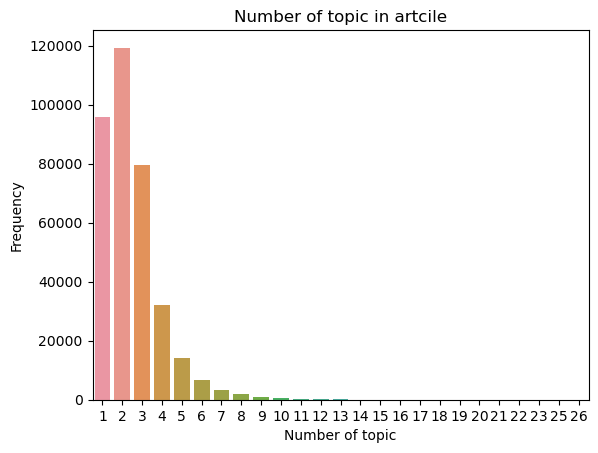

In [22]:
sns.countplot(raw_df["topic_count"])
plt.title("Number of topic in artcile")
plt.xlabel("Number of topic")
plt.ylabel("Frequency")

**Nhận xét:**
Dựa vào biểu đồ trực quan ở trên ta có thể nhận ra rằng đa phần mỗi bài báo đều có từ 1 đến 5 chủ đề là nhiều. Trong đó loại bài báo có hai chủ đề là nhiều nhất có 119311 bài báo có 2 chủ đề. Và có 1 bài báo có 26 chủ đề.

### 2. Chủ đề công nghệ thông tin có bao phủ hết tập dữ liệu không?

Lọc đi những chủ đề không liên quan tới công nghệ thông tin vẫn giữ lại bài báo.

In [23]:
def filter_cs_categories(category_list):
    return [cat.strip() for cat in category_list if cat.strip().startswith('cs.')]

raw_df['categories'] = raw_df['categories'].str.split(',').apply(filter_cs_categories)

raw_df['categories'] = raw_df['categories'].apply(lambda x: ', '.join(x))

empty = raw_df['categories'].apply(lambda x: len(x.strip()) > 0).sum()

print(f"Số ô không trống trong cột 'categories': {empty}")

print(raw_df.shape)

Số ô không trống trong cột 'categories': 354972
(354972, 9)


Vậy ta thấy số ô không trống ở categories là 354972 bằng với số ô ban đầu chưa xóa chủ đề, điều đó có nghĩa rằng là chủ đề công nghệ thông tin bảo phủ toàn bộ tập dữ liệu.

In [24]:
raw_df[['paper_id', 'categories']]

,paper_id,categories
0,2412.10373v1,"cs.CV, cs.AI, cs.LG"
1,2412.10371v1,"cs.CV, cs.AI, cs.LG, cs.RO"
2,2402.01886v2,"cs.LG, cs.AI"
3,2412.10360v1,"cs.CV, cs.AI"
4,2412.10354v1,"cs.LG, cs.AI"
...,...,...
354967,2405.16585v1,"cs.LG, cs.AI"
354968,2404.14786v2,"cs.AI, cs.LG"
354969,2405.16557v1,"cs.LG, cs.AI"
354970,2304.05749v2,"cs.LG, cs.AI"


Kiểm tra lại số lượng chủ đề tối đa có trong một bài báo và bài báo có bao nhiêu chủ đề là chiếm đa số?

In [25]:
raw_df["topic_count"] = raw_df["categories"].apply(lambda x : len(x.split(',')))
raw_df["topic_count"].value_counts()

1    186238
2    115213
3     42121
4      9702
5      1652
6        40
7         5
8         1
Name: topic_count, dtype: int64

/home/sinhtruc/miniconda3/envs/min_ds-env2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

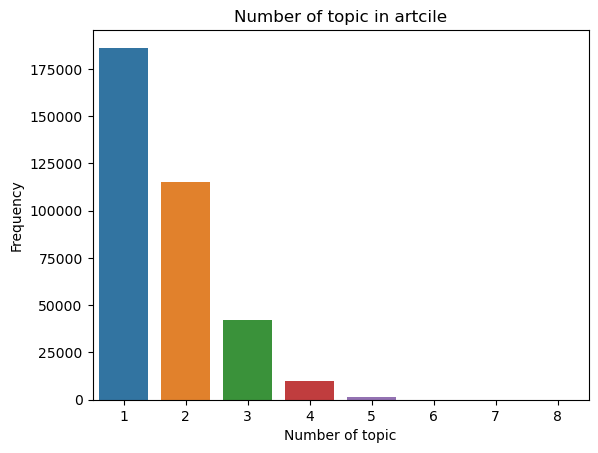

In [26]:
sns.countplot(raw_df["topic_count"])
plt.title("Number of topic in artcile")
plt.xlabel("Number of topic")
plt.ylabel("Frequency")

### 3. Xu hướng xuất bản bài viết theo thời gian như thế nào? Có tăng lên theo từng năm hay không?

In [27]:
raw_df['published_year'] = raw_df['published'].dt.year
publication_trend = raw_df['published_year'].value_counts().sort_index()

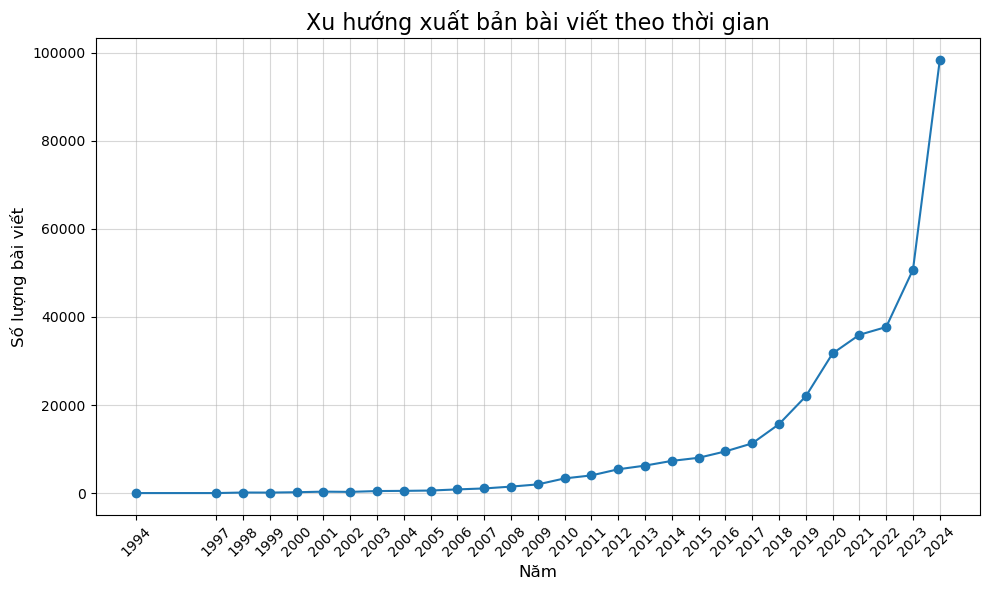

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(publication_trend.index, publication_trend.values, marker='o', linestyle='-')
plt.title("Xu hướng xuất bản bài viết theo thời gian", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng bài viết", fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(publication_trend.index, rotation=45)
plt.tight_layout()
plt.show()

**Nhận xét về xu hướng xuất bản bài viết theo thời gian:**

- Xu hướng tăng trưởng theo thời gian: Số lượng bài viết được xuất bản tăng rất ít và ổn định trong giai đoạn 1994 - 2010. Từ năm 2010 trở đi, số lượng bài viết bắt đầu tăng dần và có dấu hiệu tăng trưởng nhanh hơn. Giai đoạn 2017 - 2024 chứng kiến sự bùng nổ mạnh mẽ về số lượng bài viết, đặc biệt từ năm 2020 trở đi, đường biểu diễn cho thấy tốc độ tăng trưởng gần như theo cấp số nhân.

- Bùng nổ trong những năm gần đây (2020 - 2024): Số lượng bài viết tăng đột biến, từ khoảng hơn 20,000 bài viết vào năm 2019 lên hơn 50,000 vào năm 2023. Năm 2024 dự đoán sẽ đạt mức kỷ lục, gần 100,000 bài viết.

**Nguyên nhân có thể dẫn đến sự tăng trưởng mạnh:**

- Phát triển công nghệ và trí tuệ nhân tạo (AI): Xu hướng nghiên cứu và xuất bản trong các lĩnh vực mới như AI, Machine Learning, và Khoa học dữ liệu thúc đẩy số lượng bài viết tăng mạnh.

- Mở rộng các nền tảng xuất bản trực tuyến: Các nền tảng mở như arXiv đã tạo điều kiện thuận lợi cho việc chia sẻ nghiên cứu nhanh chóng và rộng rãi.

- Sự gia tăng của các nhà nghiên cứu và tổ chức khoa học: Cộng đồng nghiên cứu khoa học ngày càng lớn mạnh và đóng góp nhiều bài viết hơn.

**Giai đoạn ổn định trước năm 2010:** Trước năm 2010, số lượng bài viết tăng rất chậm và ổn định, cho thấy mức độ xuất bản nghiên cứu khoa học còn hạn chế.

### 4. Top 10 tác giả có số lượng bài viết cao nhất trong từng lĩnh vực? Từ đó đưa ra các phương hướng tiếp cận cho mọi người có liên quan đến lĩnh vực nghiên cứu.

In [29]:
# Bước 1: Tách các lĩnh vực ra thành danh sách
raw_df['categories_list'] = raw_df['categories'].str.split(',')

# Bước 2: Tạo một DataFrame mở rộng với từng lĩnh vực riêng lẻ
expanded_df = raw_df.explode('categories_list')

# Bước 3: Nhóm dữ liệu theo từng lĩnh vực
grouped_by_field = expanded_df.groupby('categories_list')

# Bước 4: Tìm top 10 tác giả cho từng lĩnh vực
top_authors_by_field = {}

for field, group in grouped_by_field:
    # Tách các tác giả thành danh sách
    group['authors_list'] = group['authors'].str.split(',')
    # Mở rộng danh sách tác giả
    authors_expanded = group.explode('authors_list')
    # Đếm số lượng bài viết của mỗi tác giả
    author_counts = authors_expanded['authors_list'].value_counts()
    # Lấy top 10 tác giả
    top_10_authors = author_counts.head(10)
    top_authors_by_field[field] = top_10_authors

# Bước 5: In kết quả
for field, authors in top_authors_by_field.items():
    print(f"\nLĩnh vực: {field}")
    print(authors)



Lĩnh vực:  cs.AI
Yang Liu         170
Hao Wang          99
Sergey Levine     97
Huajun Chen       87
Ningyu Zhang      87
Bo Li             86
Pieter Abbeel     79
Xiang Li          79
Philip S. Yu      78
Qi Zhang          77
Name: authors_list, dtype: int64

Lĩnh vực:  cs.AR
Onur Mutlu                       25
Luca Benini                      20
Muhammad Shafique                15
Anup Das                         14
Ataberk Olgun                    14
Samuel Pagliarini                12
Shihao Song                      12
Torsten Hoefler                  12
Rachmad Vidya Wicaksana Putra    10
Tushar Krishna                    9
Name: authors_list, dtype: int64

Lĩnh vực:  cs.CC
Ignasi Sau              31
Arne Meier              25
Venkatesan Guruswami    22
Gregory Gutin           21
Jukka Suomela           21
Bart M. P. Jansen       21
Daniël Paulusma         20
Saket Saurabh           18
Kasper Green Larsen     18
Michał Pilipczuk        18
Name: authors_list, dtype: int64

Lĩnh v

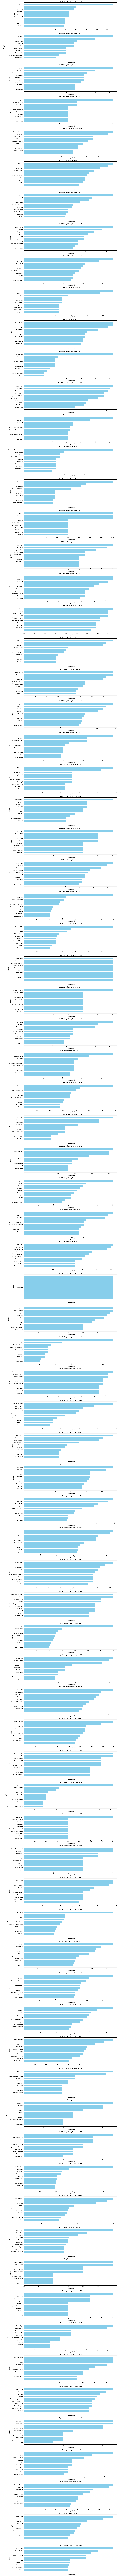

In [30]:
fields = list(top_authors_by_field.keys())
authors_data = [list(authors.values) for authors in top_authors_by_field.values()]
authors_labels = [list(authors.index) for authors in top_authors_by_field.values()]

# Vẽ biểu đồ
plt.figure(figsize=(15, len(fields) * 4))

for i, (field, counts, labels) in enumerate(zip(fields, authors_data, authors_labels)):
    plt.subplot(len(fields), 1, i + 1)
    plt.barh(labels, counts, color='skyblue')
    plt.xlabel("Số lượng bài viết")
    plt.ylabel("Tác giả")
    plt.title(f"Top 10 tác giả trong lĩnh vực: {field}")
    plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

**Nhận xét:**
- Phân bố đóng góp của tác giả: Biểu đồ thể hiện rõ mức độ đóng góp của từng tác giả vào số lượng bài viết trong danh sách được thống kê.

- Vai trò quan trọng của nghiên cứu khoa học: Số lượng bài viết cao có thể phản ánh: Năng suất làm việc cao của các tác giả, Mức độ tham gia của họ trong cộng đồng nghiên cứu và học thuật, Khả năng mở rộng và phát triển các chủ đề nghiên cứu liên quan.

### 5. Số lượng bài báo có chủ đề công nghệ thông tin? Và từ đó cho thấy các lĩnh vực nghiên cứu nào xuất hiện nhiều nhất trong dữ liệu?

In [31]:
# Tách danh mục từ cột 'categories'
categories_series = raw_df['categories'].str.split(',')

# Làm phẳng danh sách các danh mục và loại bỏ khoảng trắng thừa
all_categories = []
for sublist in categories_series:
    for category in sublist:
        all_categories.append(category.strip())

# Đếm tần suất xuất hiện của từng danh mục
category_counts = Counter(all_categories)

# Tạo DataFrame từ kết quả đếm
category_counts_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# Lọc chỉ các danh mục bắt đầu với "cs."
cs_categories = category_counts_df[category_counts_df['Category'].str.startswith('cs.')].reset_index(drop=True)
cs_categories

,Category,Count
0,cs.LG,75872
1,cs.AI,54147
2,cs.CV,35064
3,cs.CL,33214
4,cs.CR,27859
5,cs.IT,27557
6,cs.RO,26638
7,cs.SY,25674
8,cs.DS,25082
9,cs.NA,24309


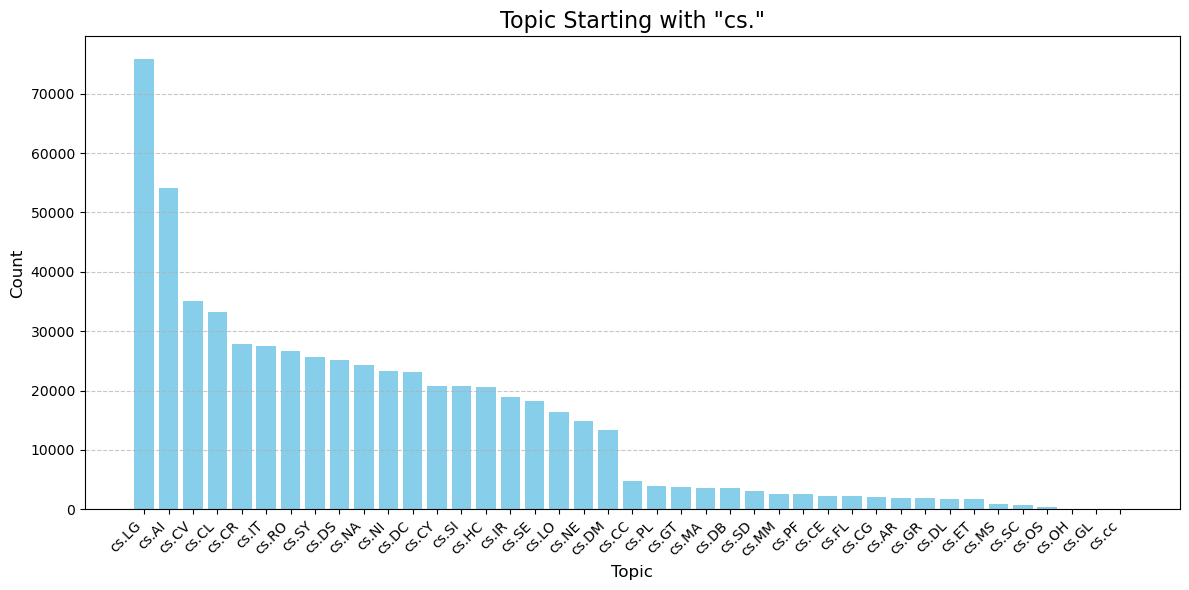

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(cs_categories['Category'], cs_categories['Count'], color='skyblue')
plt.title('Topic Starting with "cs."', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Xu hướng nghiên cứu tập trung chủ yếu vào các lĩnh vực Machine Learning (cs.LG), AI (cs.AI), và Computer Vision (cs.CV).
- Các chủ đề liên quan đến bảo mật (cs.CR), công nghệ thông tin (cs.IT), thuật toán (cs.DS), và robot (cs.RO) cũng nhận được sự quan tâm đáng kể.
- Một số chủ đề truyền thống như Operating Systems (cs.OS) hoặc Computational Complexity (cs.CC) hiện có ít nghiên cứu hơn, phản ánh sự thay đổi ưu tiên trong cộng đồng khoa học máy tính.

### Với sự khám phá ở câu hỏi số 5. 
Chúng em nhận thấy rằng các chủ đề ở sau có khá ít bài báo. Dẫn đến khi huấn luyện sẽ ảnh hưởng đến độ chính xác của mô hình. Vậy nên nhóm chúng em chọn ra 20 chủ đề với số lượng bài báo là cao nhất.

In [33]:
dict_category = {}
for id, key in enumerate(cs_categories['Category']):
    if id < 20: # 20 chủ đề với số lượng bài báo cao nhất
        dict_category[key] = 1
    else:
        dict_category[key] = 0
# Định nghĩa hàm điều kiện
def condition_to_delete(x):
    for category in x.split(','):
        if dict_category[category.strip()] == 0:
            return True
    return False

# Áp dụng hàm để lọc các dòng
raw_df = raw_df[~raw_df['categories'].apply(condition_to_delete)]
raw_df.shape

(314049, 11)

In [34]:
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment,topic_count,published_year,categories_list
0,2412.10373v1,"Sicheng Zuo,Wenzhao Zheng,Yuanhui Huang,Jie Zh...",2024-12-13 18:59:54,2024-12-13 18:59:54,GaussianWorld: Gaussian World Model for Stream...,3D occupancy prediction is important for aut...,"cs.CV, cs.AI, cs.LG",Code is available at: https://github.com/zuosc...,3,2024,"[cs.CV, cs.AI, cs.LG]"
1,2412.10371v1,"Wenzhao Zheng,Junjie Wu,Yao Zheng,Sicheng Zuo,...",2024-12-13 18:59:30,2024-12-13 18:59:30,GaussianAD: Gaussian-Centric End-to-End Autono...,Vision-based autonomous driving shows great ...,"cs.CV, cs.AI, cs.LG, cs.RO",Code is available at: https://github.com/wzzhe...,4,2024,"[cs.CV, cs.AI, cs.LG, cs.RO]"
2,2402.01886v2,"Mark Beliaev,Ramtin Pedarsani",2024-12-13 18:59:14,2024-02-02 20:21:09,Inverse Reinforcement Learning by Estimating E...,"In Imitation Learning (IL), utilizing subopt...","cs.LG, cs.AI","11 pages, 4 figures, extended version of AAAI ...",2,2024,"[cs.LG, cs.AI]"
3,2412.10360v1,"Orr Zohar,Xiaohan Wang,Yann Dubois,Nikhil Meht...",2024-12-13 18:53:24,2024-12-13 18:53:24,Apollo: An Exploration of Video Understanding ...,Despite the rapid integration of video perce...,"cs.CV, cs.AI",https://apollo-lmms.github.io,2,2024,"[cs.CV, cs.AI]"
4,2412.10354v1,"Jean Kossaifi,Nikola Kovachki,Zongyi Li,Davit ...",2024-12-13 18:49:37,2024-12-13 18:49:37,A Library for Learning Neural Operators,"We present NeuralOperator, an open-source Py...","cs.LG, cs.AI",Not available,2,2024,"[cs.LG, cs.AI]"
...,...,...,...,...,...,...,...,...,...,...,...
354967,2405.16585v1,"Yuhang Chen,Wenke Huang,Mang Ye",2024-05-26 14:29:10,2024-05-26 14:29:10,Fair Federated Learning under Domain Skew with...,Federated learning (FL) has emerged as a new...,"cs.LG, cs.AI",Accepted by CVPR2024,2,2024,"[cs.LG, cs.AI]"
354968,2404.14786v2,"Peiwen Li,Xin Wang,Zeyang Zhang,Yuan Meng,Fang...",2024-05-26 13:08:00,2024-04-23 06:52:40,RealTCD: Temporal Causal Discovery from Interv...,In the field of Artificial Intelligence for ...,"cs.AI, cs.LG",Not available,2,2024,"[cs.AI, cs.LG]"
354969,2405.16557v1,"Chun-Kai Huang,Yi-Hsien Hsieh,Ta-Jung Chien,Li...",2024-05-26 13:06:45,2024-05-26 13:06:45,Scalable Numerical Embeddings for Multivariate...,"Multivariate time series (MTS) data, when sa...","cs.LG, cs.AI",Not available,2,2024,"[cs.LG, cs.AI]"
354970,2304.05749v2,"Yuxing Tian,Mingjie Zhu,Jiachi Luo,Song Li",2024-05-26 10:47:29,2023-04-12 10:05:07,Boosting long-term forecasting performance for...,This study focuses on long-term forecasting ...,"cs.LG, cs.AI",Recent evidence has emerged that directly cont...,2,2023,"[cs.LG, cs.AI]"


In [35]:
from sklearn.preprocessing import MultiLabelBinarizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Khởi tạo lại các biến và cài đặt cần thiết
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Chuyển đổi categories thành danh sách nhãn
raw_df['categorieslist'] = raw_df['categories'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(raw_df['categorieslist'])
labels = mlb.classes_

# Tiền xử lý text
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

raw_df['text'] = raw_df['title'] + " " + raw_df['abstract']
raw_df['text'] = raw_df['text'].str.lower()
raw_df['text'] = raw_df['text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
raw_df['text'] = raw_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
raw_df['text'] = raw_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Tạo DataFrame kết hợp X và Y
X_Y_df = pd.DataFrame(raw_df['text'])  # Bắt đầu với cột 'text'
for i, label in enumerate(labels):    # Thêm mỗi nhãn vào DataFrame
    X_Y_df[label] = Y[:, i]

# Lưu vào file CSV
output_file = 'processed_arxiv_cs_papers_3.csv'
X_Y_df.to_csv(output_file, index=False)
print(f"File đã được lưu tại: {output_file}")


[nltk_data] Downloading package punkt to /home/sinhtruc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sinhtruc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sinhtruc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/tmp/ipykernel_1093/3928295479.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['categorieslist'] = raw_df['categories'].apply(lambda x: x.split(', '))
/tmp/ipykernel_1093/3928295479.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

File đã được lưu tại: processed_arxiv_cs_papers_3.csv
